In [78]:
import glob
import os
from astropy.io import fits
from matplotlib import pyplot
from astropy.convolution import convolve, Box1DKernel
%matplotlib inline

In [2]:
obsid_base = '000340400'
os.chdir('../data/swiftuvot/reduced')
original_dir = os.getcwd()

In [133]:
good_range = [1700,2740]
contamination_range = [2740, 5000]
pa_dict = {1:248, 2:260, 5:248, 7:260, 9:248, 11:260}
visit_list = [1, 2, 5, 7, 9, 11]

In [152]:
os.chdir(original_dir)

# Plot First Visit

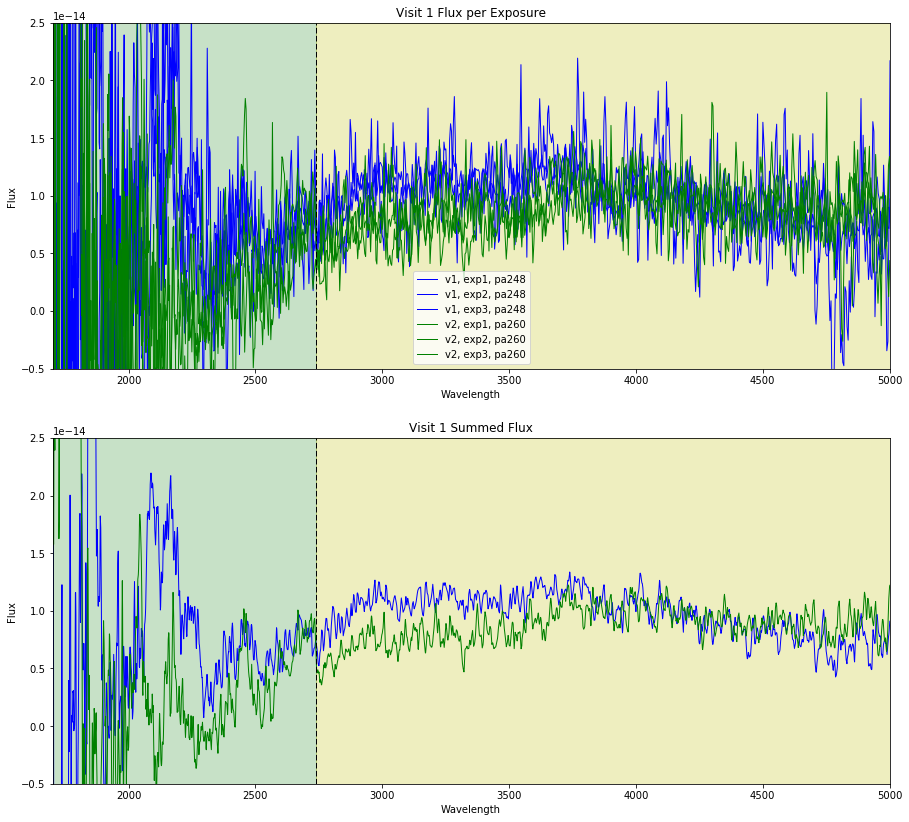

In [142]:
observations = [1, 2]
colors = ['b', 'g']
fig = pyplot.figure(figsize=[15, 14])
ax1 = fig.add_subplot(2, 1,1)
ax2 = fig.add_subplot(2,1, 2)
ax1.axvspan(good_range[0], good_range[1],color='ForestGreen', alpha = 0.25)
ax1.axvspan(contamination_range[0], contamination_range[1], color='y', alpha=0.25)
ax2.axvspan(good_range[0], good_range[1],color='ForestGreen', alpha = 0.25)
ax2.axvspan(contamination_range[0], contamination_range[1], color='y', alpha=0.25)
line_list = []
label_list = []


for i, obs in enumerate(observations):
    obsid = '{}{:2}'.format(obsid_base, obs).replace(' ', '0')
    os.chdir(os.path.join(obsid, 'uvot', 'image'))
    flist = glob.glob('*pha*')
    for exp, ifile in enumerate(flist):
        tbdata = fits.getdata(ifile, 2)
        iline = ax1.plot(tbdata['lambda'], tbdata['flux'], color=colors[i],
                         label='v{}, exp{}, pa{}'.format(obs,exp+1,pa_dict[visit_list[i]] ))

        

    x1d = fits.getdata('{}_x1dsum.fits'.format(obsid), 1)
    ax2.plot(x1d['wave'], x1d['flux'], color=colors[i])
    os.chdir(original_dir)
    
ax1.set_ylim(-0.5E-14, 0.25E-13)
ax1.axvline(2740, ls='--', color='k')
ax1.set_xlim(good_range[0], contamination_range[1])
ax1.set_title('Visit 1 Flux per Exposure')
ax1.set_ylabel("Flux")
ax1.set_xlabel("Wavelength")
ax1.legend(loc='best')

ax2.set_ylim(-0.5E-14, 0.25E-13)
ax2.axvline(2740, ls='--', color='k')
ax2.set_xlim(good_range[0], contamination_range[1])
ax2.set_xlabel("Wavelength")
ax2.set_title('Visit 1 Summed Flux')
ax2.set_ylabel('Flux')



pyplot.savefig('../../../figures/visit1_flux.pdf')

# Plot Second Visit

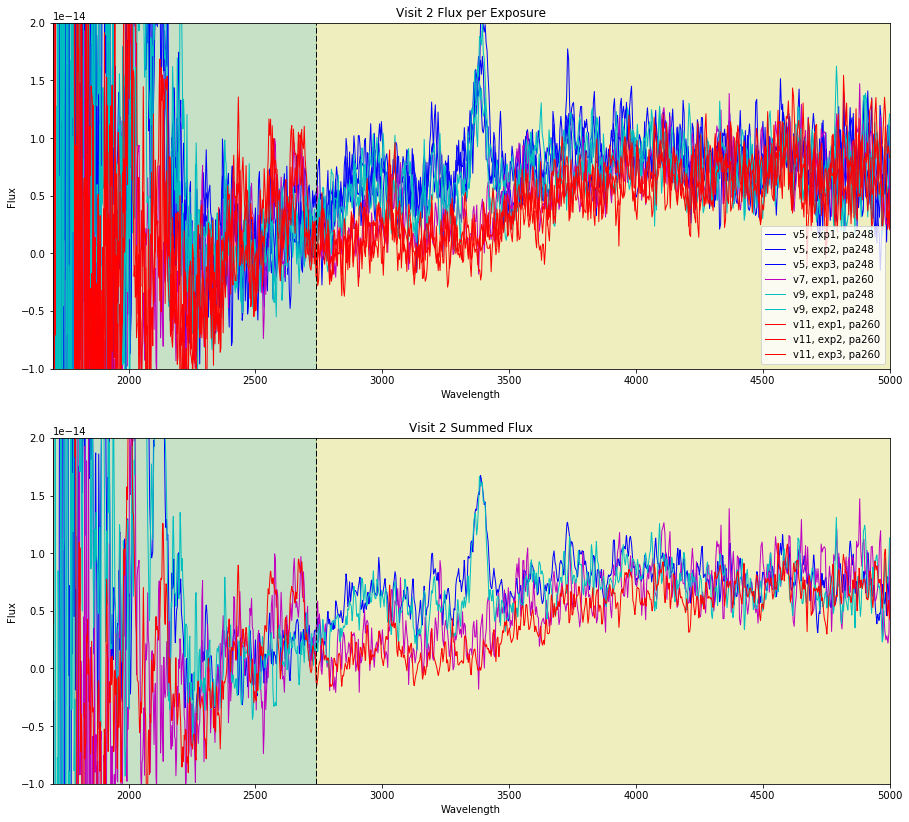

In [143]:
observations = [5, 7, 9, 11]
colors = ['b', 'm', 'c', 'r']
fig = pyplot.figure(figsize=[15, 14])
ax1 = fig.add_subplot(2, 1,1)
ax2 = fig.add_subplot(2,1, 2)
ax1.axvspan(good_range[0], good_range[1],color='ForestGreen', alpha = 0.25)
ax1.axvspan(contamination_range[0], contamination_range[1], color='y', alpha=0.25)
ax2.axvspan(good_range[0], good_range[1],color='ForestGreen', alpha = 0.25)
ax2.axvspan(contamination_range[0], contamination_range[1], color='y', alpha=0.25)

for i, obs in enumerate(observations):
    obsid = '{}{:2}'.format(obsid_base, obs).replace(' ', '0')
    os.chdir(os.path.join(obsid, 'uvot', 'image'))
    flist = glob.glob('*pha*')
    for exp,ifile in enumerate(flist):
        tbdata = fits.getdata(ifile, 2)
        ax1.plot(tbdata['lambda'], tbdata['flux'], color=colors[i], 
                label='v{}, exp{}, pa{}'.format(obs,exp+1,pa_dict[visit_list[i]]))
    

    if len(flist)>1:
        x1d = fits.getdata('{}_x1dsum.fits'.format(obsid), 1)
        ax2.plot(x1d['wave'], x1d['flux'], color=colors[i])
    else:
        ax2.plot(tbdata['lambda'], tbdata['flux'], color=colors[i])
    os.chdir(original_dir)
    
ax1.set_ylim(-0.1E-13, 0.2E-13)
ax1.axvline(2740, ls='--', color='k')
ax1.set_xlim(good_range[0], contamination_range[1])
ax1.set_title('Visit 2 Flux per Exposure')
ax1.set_ylabel("Flux")
ax1.set_xlabel("Wavelength")
ax1.legend(loc='best')

ax2.set_ylim(-0.1E-13, 0.2E-13)
ax2.axvline(2740, ls='--', color='k')
ax2.set_xlim(good_range[0], contamination_range[1])
ax2.set_title('Visit 2 Summed Flux')
ax2.set_ylabel("Flux")
ax2.set_xlabel("Wavelength")

pyplot.savefig('../../../figures/visit2_flux.pdf')

# Plot Roll Angle 248

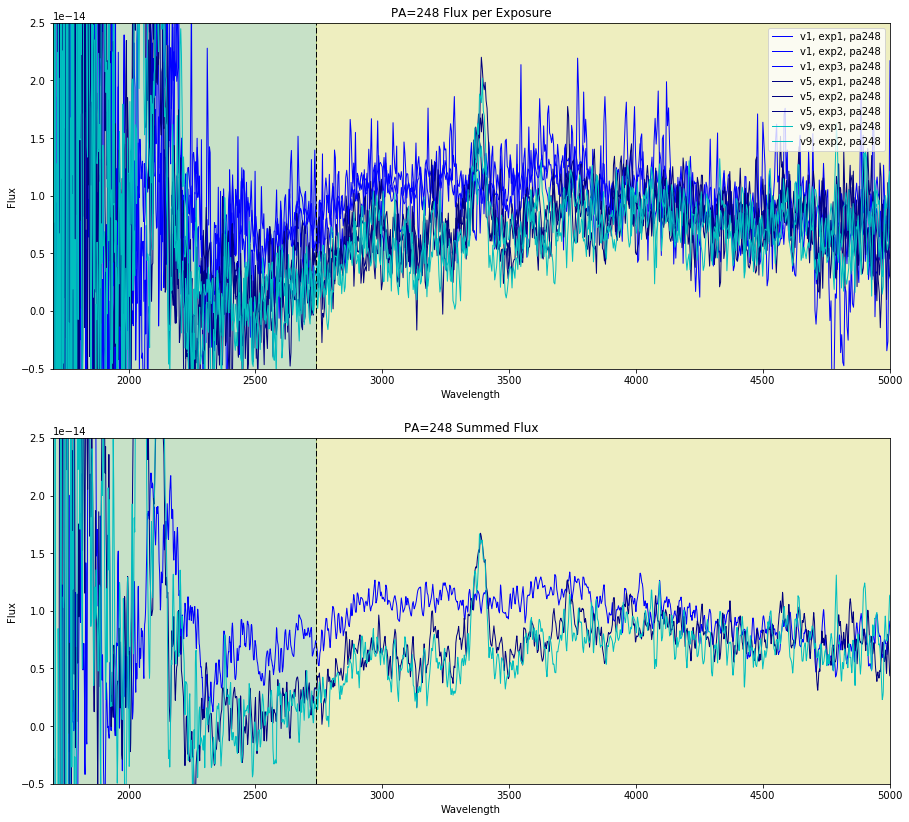

In [153]:
colors = ['b', 'r', 'Navy', 'm', 'c', 'DarkRed']
fig = pyplot.figure(figsize=[15, 14])
ax1 = fig.add_subplot(2, 1,1)
ax2 = fig.add_subplot(2,1, 2)
ax1.axvspan(good_range[0], good_range[1],color='ForestGreen', alpha = 0.25)
ax1.axvspan(contamination_range[0], contamination_range[1], color='y', alpha=0.25)
ax2.axvspan(good_range[0], good_range[1],color='ForestGreen', alpha = 0.25)
ax2.axvspan(contamination_range[0], contamination_range[1], color='y', alpha=0.25)

for i, obs in enumerate(visit_list):
    if pa_dict[visit_list[i]] == 248:
        obsid = '{}{:2}'.format(obsid_base, obs).replace(' ', '0')
        os.chdir(os.path.join(obsid, 'uvot', 'image'))
        flist = glob.glob('*pha*')
        for exp, ifile in enumerate(flist):
            tbdata = fits.getdata(ifile, 2)
            ax1.plot(tbdata['lambda'], tbdata['flux'], color=colors[i],
                    label='v{}, exp{}, pa{}'.format(obs,exp+1,pa_dict[visit_list[i]]))

        if len(flist)>1:
            x1d = fits.getdata('{}_x1dsum.fits'.format(obsid), 1)
            ax2.plot(x1d['wave'], x1d['flux'], color=colors[i])
        os.chdir(original_dir)
    
ax1.set_ylim(-0.5E-14, 0.25E-13)
ax1.axvline(2740, ls='--', color='k')
ax1.set_xlim(good_range[0], contamination_range[1])
ax1.set_title('PA=248 Flux per Exposure')
ax1.set_ylabel("Flux")
ax1.set_xlabel("Wavelength")
ax1.legend(loc='best')

ax2.set_ylim(-0.5E-14, 0.25E-13)
ax2.axvline(2740, ls='--', color='k')
ax2.set_xlim(good_range[0], contamination_range[1])
ax2.set_title('PA=248 Summed Flux')
ax2.set_ylabel("Flux")
ax2.set_xlabel("Wavelength")

pyplot.savefig('../../../figures/PA248_flux.pdf')

# Plot Roll Angle 260

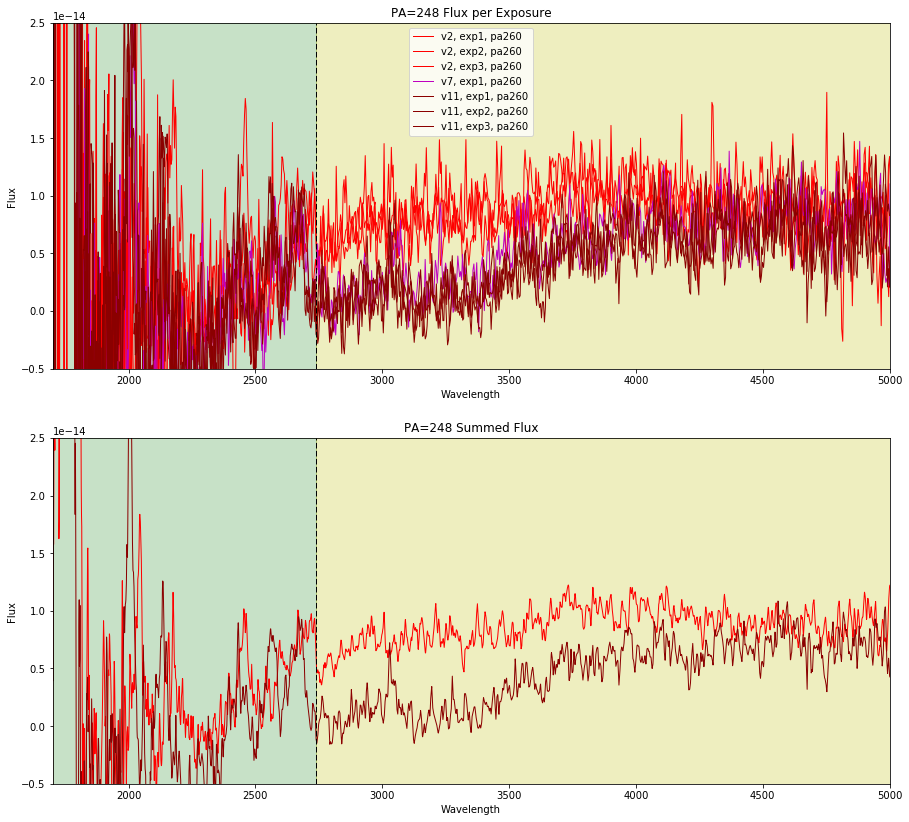

In [154]:
colors = ['b', 'r', 'Navy', 'm', 'c', 'DarkRed']
fig = pyplot.figure(figsize=[15, 14])
ax1 = fig.add_subplot(2, 1,1)
ax2 = fig.add_subplot(2,1, 2)
ax1.axvspan(good_range[0], good_range[1],color='ForestGreen', alpha = 0.25)
ax1.axvspan(contamination_range[0], contamination_range[1], color='y', alpha=0.25)
ax2.axvspan(good_range[0], good_range[1],color='ForestGreen', alpha = 0.25)
ax2.axvspan(contamination_range[0], contamination_range[1], color='y', alpha=0.25)

for i, obs in enumerate(visit_list):
    if pa_dict[visit_list[i]] == 260:
        obsid = '{}{:2}'.format(obsid_base, obs).replace(' ', '0')
        os.chdir(os.path.join(obsid, 'uvot', 'image'))
        flist = glob.glob('*pha*')
        for exp, ifile in enumerate(flist):
            tbdata = fits.getdata(ifile, 2)
            ax1.plot(tbdata['lambda'], tbdata['flux'], color=colors[i],
                    label='v{}, exp{}, pa{}'.format(obs,exp+1,pa_dict[visit_list[i]]))

        if len(flist)>1:
            x1d = fits.getdata('{}_x1dsum.fits'.format(obsid), 1)
            ax2.plot(x1d['wave'], x1d['flux'], color=colors[i])
        os.chdir(original_dir)
    
ax1.set_ylim(-0.5E-14, 0.25E-13)
ax1.axvline(2740, ls='--', color='k')
ax1.set_xlim(good_range[0], contamination_range[1])
ax1.set_title('PA=248 Flux per Exposure')
ax1.set_ylabel("Flux")
ax1.set_xlabel("Wavelength")
ax1.legend(loc='best')

ax2.set_ylim(-0.5E-14, 0.25E-13)
ax2.axvline(2740, ls='--', color='k')
ax2.set_xlim(good_range[0], contamination_range[1])
ax2.set_title('PA=248 Summed Flux')
ax2.set_ylabel("Flux")
ax2.set_xlabel("Wavelength")

pyplot.savefig('../../../figures/PA260_flux.pdf')

# Plot All Background

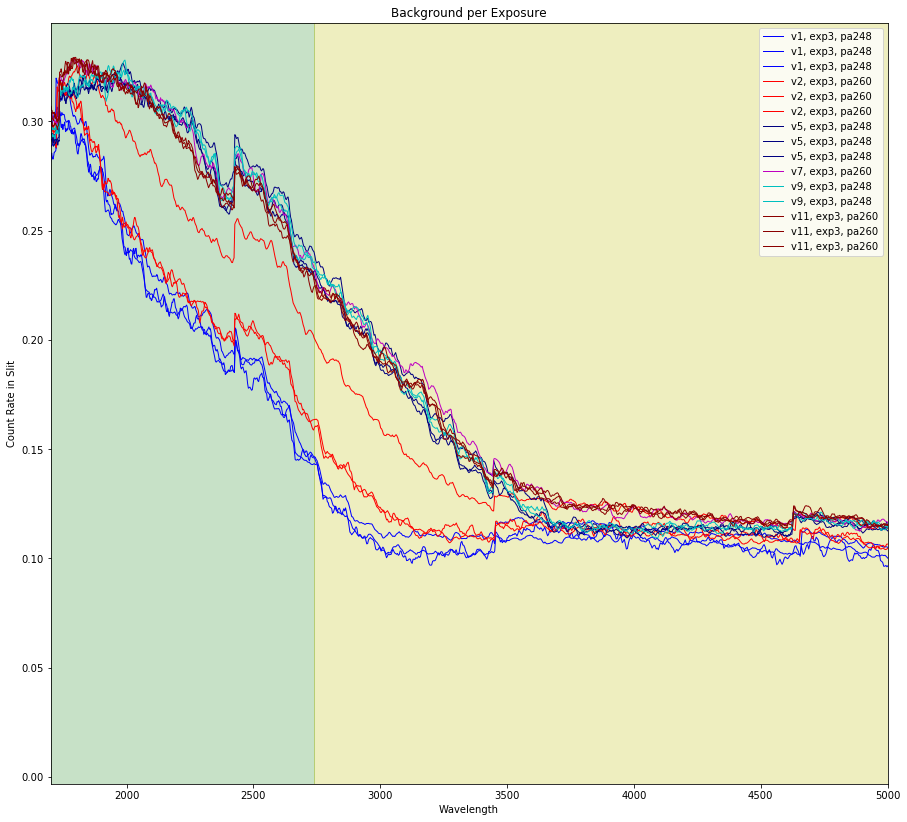

In [158]:
colors = ['b', 'r', 'Navy', 'm', 'c', 'DarkRed']
fig = pyplot.figure(figsize=[15, 14])
ax1 = fig.add_subplot(1,1,1)
ax1.axvspan(good_range[0], good_range[1],color='ForestGreen', alpha = 0.25)
ax1.axvspan(contamination_range[0], contamination_range[1], color='y', alpha=0.25)

for i, obs in enumerate(visit_list):
    obsid = '{}{:2}'.format(obsid_base, obs).replace(' ', '0')
    os.chdir(os.path.join(obsid, 'uvot', 'image'))
    flist = glob.glob('*pha*')
    for ifile in flist:
        tbdata = fits.getdata(ifile, 2)
        ax1.plot(tbdata['lambda'], tbdata['bkgrate1'], color=colors[i],
                label='v{}, exp{}, pa{}'.format(obs,exp+1,pa_dict[visit_list[i]]))
        
    os.chdir(original_dir)

ax1.set_xlim(good_range[0], contamination_range[1])

ax1.set_title('Background per Exposure')
ax1.set_ylabel("Count Rate in Slit")
ax1.set_xlabel("Wavelength")
ax1.legend(loc='best')

pyplot.savefig('../../../figures/background_rate.pdf')

# How is Background affecting Exposure

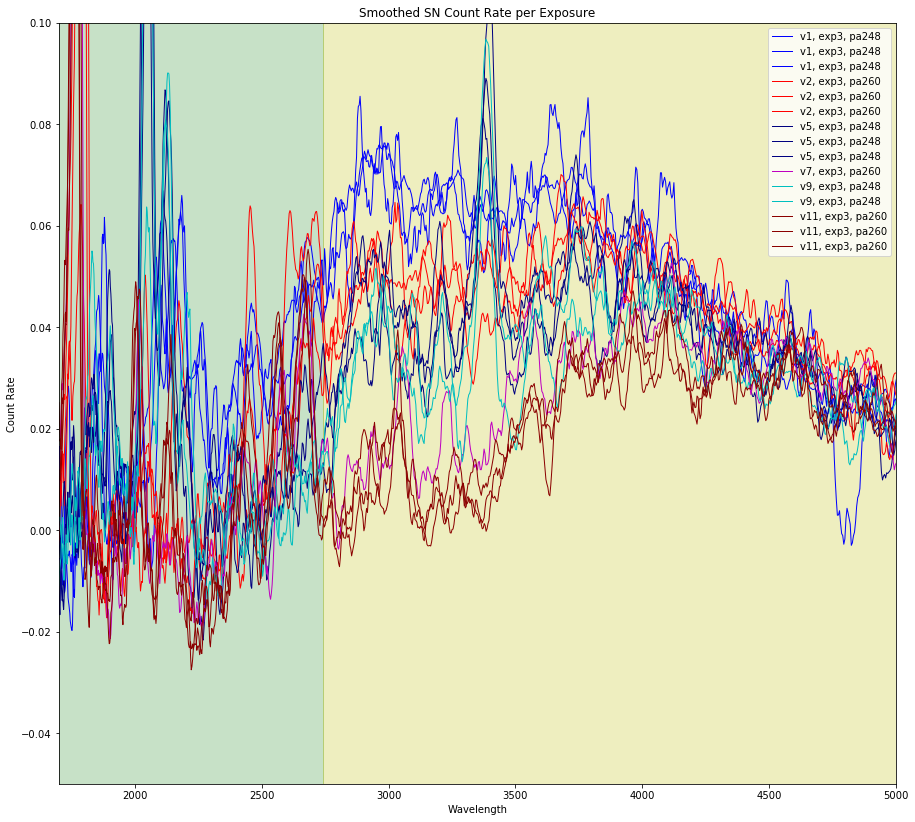

In [160]:
colors = ['b', 'r', 'Navy', 'm', 'c', 'DarkRed']
fig = pyplot.figure(figsize=[15, 14])
ax1 = fig.add_subplot(1,1,1)
ax1.axvspan(good_range[0], good_range[1],color='ForestGreen', alpha = 0.25)
ax1.axvspan(contamination_range[0], contamination_range[1], color='y', alpha=0.25)

for i, obs in enumerate(visit_list):
    obsid = '{}{:2}'.format(obsid_base, obs).replace(' ', '0')
    os.chdir(os.path.join(obsid, 'uvot', 'image'))
    flist = glob.glob('*pha*')
    for ifile in flist:
        tbdata = fits.getdata(ifile, 2)
        ax1.plot(tbdata['lambda'], convolve(tbdata['netrate'], Box1DKernel(11)), color=colors[i],
                label='v{}, exp{}, pa{}'.format(obs,exp+1,pa_dict[visit_list[i]]))
        
    os.chdir(original_dir)

ax1.set_ylim(-0.05, 0.1)
ax1.set_xlim(good_range[0], contamination_range[1])
ax1.set_title('Smoothed SN Count Rate per Exposure')
ax1.set_ylabel("Count Rate")
ax1.set_xlabel("Wavelength")
ax1.legend(loc='best')

pyplot.savefig('../../../figures/netrate_by_PA.pdf')

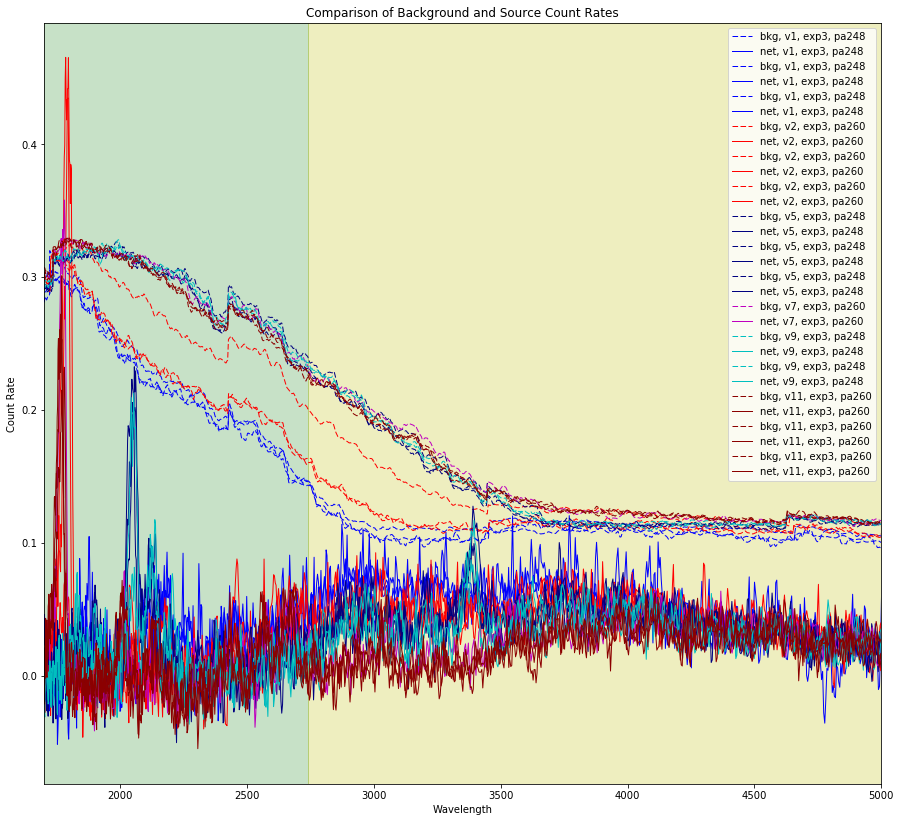

In [161]:
colors = ['b', 'r', 'Navy', 'm', 'c', 'DarkRed']
fig = pyplot.figure(figsize=[15, 14])
ax1 = fig.add_subplot(1,1,1)
ax1.axvspan(good_range[0], good_range[1],color='ForestGreen', alpha = 0.25)
ax1.axvspan(contamination_range[0], contamination_range[1], color='y', alpha=0.25)

for i, obs in enumerate(visit_list):
    obsid = '{}{:2}'.format(obsid_base, obs).replace(' ', '0')
    os.chdir(os.path.join(obsid, 'uvot', 'image'))
    flist = glob.glob('*pha*')
    for ifile in flist:
        tbdata = fits.getdata(ifile, 2)
        ax1.plot(tbdata['lambda'], tbdata['bkgrate1'], color=colors[i], ls='--',
                label='bkg, v{}, exp{}, pa{}'.format(obs,exp+1,pa_dict[visit_list[i]]))
        ax1.plot(tbdata['lambda'], tbdata['netrate'], color=colors[i],
                label='net, v{}, exp{}, pa{}'.format(obs,exp+1,pa_dict[visit_list[i]]))
        
    os.chdir(original_dir)
ax1.set_xlim(good_range[0], contamination_range[1])
ax1.set_title('Comparison of Background and Source Count Rates')
ax1.set_ylabel("Count Rate")
ax1.set_xlabel("Wavelength")
ax1.legend(loc='best')
pyplot.savefig('../../../figures/net_bkg_comp.pdf')

In [157]:
os.chdir(original_dir)